# Melhorias a serem feitas:
- Analisar os dados de maneira normalizada para uma analise mais acertiva da diferença entre cada um dos grupos.
- Cruzar os dados com a quantidade da população da faixa etaria que faz enem para verificar % da população que tenta o SISU.

# Imports

In [1]:
import keras
import numpy as np
import pandas as pd
import tensorflow
import matplotlib.pyplot as plt
import statistics as stt
import csv
from datetime import datetime

# Visualização

In [2]:
#Adicione o endeço do arquivo ListagemChamadaRegular_2021-1
endereco = 'C:/Users/raphi/OneDrive/Área de Trabalho/horas de ext/ListagemChamadaRegular_2021-1.csv'
ListReg = pd.read_csv(endereco, sep=';')  
ListReg.head()

C:\Users\raphi\AppData\Local\Temp\ipykernel_18704\1923365063.py:1: DtypeWarning: Columns (20,22) have mixed types. Specify dtype option on import or set low_memory=False.
  ListReg = pd.read_csv('C:/Users/raphi/OneDrive/Área de Trabalho/horas de ext/ListagemChamadaRegular_2021-1.csv', sep=';')


NU_ANO  NU_EDICAO  CO_ETAPA    DS_ETAPA  CO_IES  \
0    2021          1         4  1° CHAMADA     578   
1    2021          1         4  1° CHAMADA     578   
2    2021          1         4  1° CHAMADA     578   
3    2021          1         4  1° CHAMADA     578   
4    2021          1         4  1° CHAMADA     578   

                          NO_IES SIGLA_IES SG_UF_IES  CO_CAMPUS  \
0  UNIVERSIDADE FEDERAL DA BAHIA      UFBA        BA    1047105   
1  UNIVERSIDADE FEDERAL DA BAHIA      UFBA        BA    1047105   
2  UNIVERSIDADE FEDERAL DA BAHIA      UFBA        BA    1047105   
3  UNIVERSIDADE FEDERAL DA BAHIA      UFBA        BA    1047105   
4  UNIVERSIDADE FEDERAL DA BAHIA      UFBA        BA    1047105   

       NO_CAMPUS  ... NOTA_L_COM_PESO NOTA_CH_COM_PESO  NOTA_CN_COM_PESO  \
0  CAMPUS CANELA  ...            1662           1442,1            2091,2   
1  CAMPUS CANELA  ...            1332           1164,9            1734,4   
2  CAMPUS CANELA  ...          1637,1           1637,7              1764   
3  CAMPUS CANELA  ...            1608           1501,5            2285,6   
4  CAMPUS CANELA  ...          1555,8           1407,6            1769,6   

  NOTA_M_COM_PESO NOTA_R_COM_PESO NU_NOTA_CANDIDATO NU_NOTACORTE  \
0           769,2            1320            485,63       628,15   
1             961            1560            450,15       702,38   
2           814,2            1620             498,2       628,15   
3          1157,6            2040            572,85       697,97   
4            1018            1080             455,4       655,05   

  NU_CLASSIFICACAO  ST_APROVADO ST_MATRICULA  
0            301.0            N     PENDENTE  
1             65.0            N     PENDENTE  
2            248.0            N     PENDENTE  
3            307.0            N     PENDENTE  
4            191.0            N     PENDENTE  

[5 rows x 53 columns]

# Exclusão de dados que não serão utilizados

In [3]:
ListReg = ListReg.drop(['CO_ETAPA', 'DS_ETAPA', 'CO_IES', 'NO_IES', 'CO_CAMPUS', 'CO_IES_CURSO'], axis=1)
ListReg.head()

NU_ANO  NU_EDICAO SIGLA_IES SG_UF_IES      NO_CAMPUS SG_UF_CAMPUS  \
0    2021          1      UFBA        BA  CAMPUS CANELA           BA   
1    2021          1      UFBA        BA  CAMPUS CANELA           BA   
2    2021          1      UFBA        BA  CAMPUS CANELA           BA   
3    2021          1      UFBA        BA  CAMPUS CANELA           BA   
4    2021          1      UFBA        BA  CAMPUS CANELA           BA   

  NO_MUNUCIPIO_CAMPUS  NO_CURSO      DS_GRAU  DS_TURNO  ... NOTA_L_COM_PESO  \
0            Salvador  NUTRIÇÃO  Bacharelado  Integral  ...            1662   
1            Salvador  NUTRIÇÃO  Bacharelado  Integral  ...            1332   
2            Salvador  NUTRIÇÃO  Bacharelado  Integral  ...          1637,1   
3            Salvador  NUTRIÇÃO  Bacharelado  Integral  ...            1608   
4            Salvador  NUTRIÇÃO  Bacharelado  Integral  ...          1555,8   

  NOTA_CH_COM_PESO  NOTA_CN_COM_PESO NOTA_M_COM_PESO NOTA_R_COM_PESO  \
0           1442,1            2091,2           769,2            1320   
1           1164,9            1734,4             961            1560   
2           1637,7              1764           814,2            1620   
3           1501,5            2285,6          1157,6            2040   
4           1407,6            1769,6            1018            1080   

  NU_NOTA_CANDIDATO NU_NOTACORTE NU_CLASSIFICACAO ST_APROVADO ST_MATRICULA  
0            485,63       628,15            301.0           N     PENDENTE  
1            450,15       702,38             65.0           N     PENDENTE  
2             498,2       628,15            248.0           N     PENDENTE  
3            572,85       697,97            307.0           N     PENDENTE  
4             455,4       655,05            191.0           N     PENDENTE  

[5 rows x 47 columns]

# Quantidade e porcentagem de aprovados por sexo

<AxesSubplot:title={'center':'Aprovados por Sexo'}>

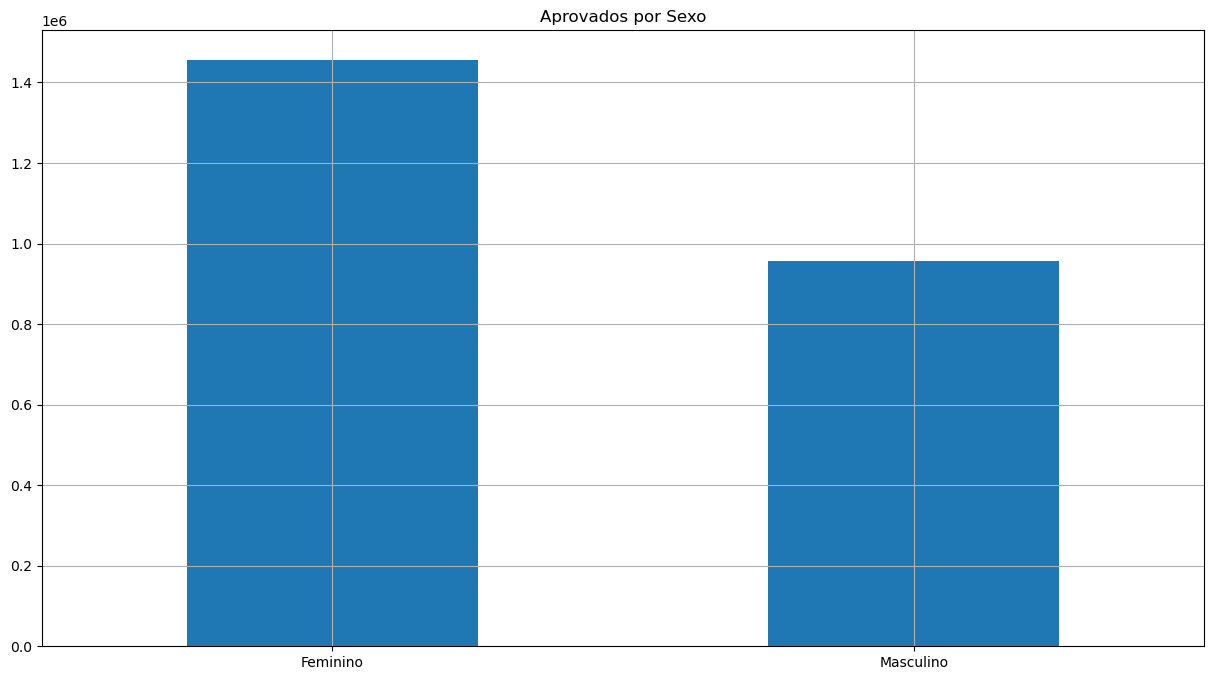

In [4]:
sexo_br = ListReg.groupby('TP_SEXO').count()
sexo_br = sexo_br['NU_ANO']
sexo_br.index = ['Feminino', 'Masculino']
sexo_br.plot(kind='bar',title='Aprovados por Sexo', figsize=(15,8), rot=0, grid=True)

<AxesSubplot:title={'center':'Aprovados por Sexo'}>

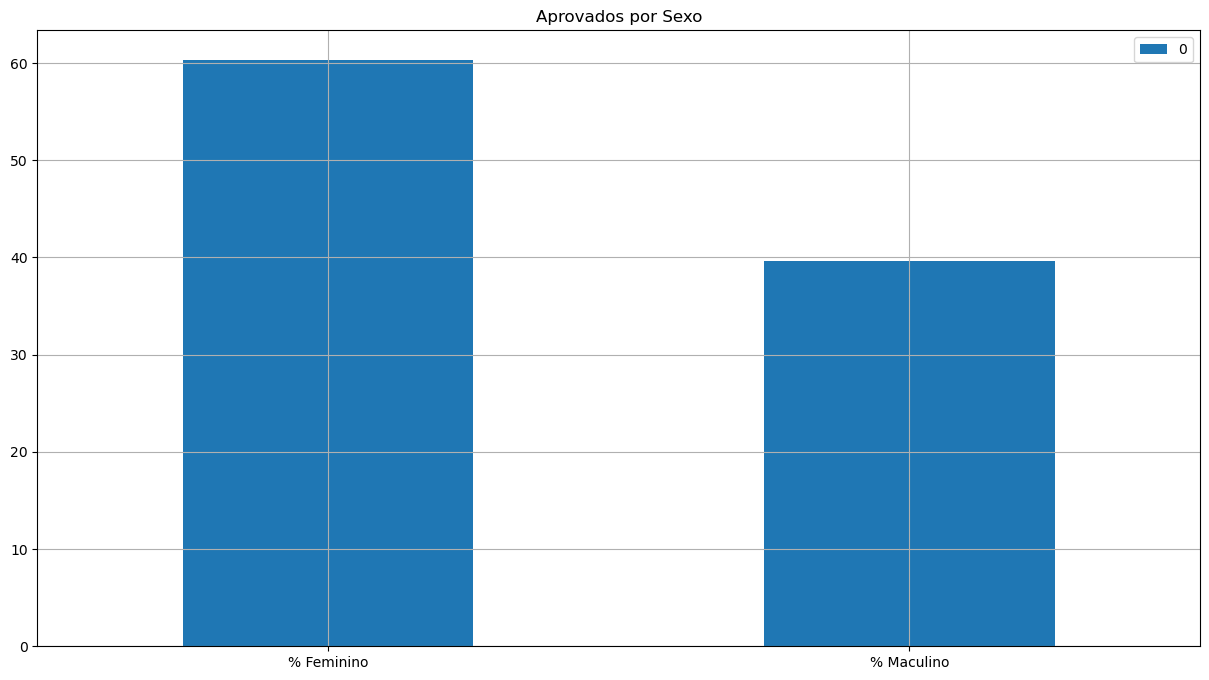

In [5]:
pc_sexo_br = pd.DataFrame([100 * sexo_br.Feminino / (sexo_br.Feminino + sexo_br.Masculino), 100 * sexo_br.Masculino / (sexo_br.Feminino + sexo_br.Masculino)],['% Feminino', '% Maculino'])
pc_sexo_br.plot(kind='bar',title='Aprovados por Sexo', figsize=(15,8), rot=0, grid=True)

## OBS:
Numero muito maior de mulheres o que mostra a desigualdade de gênero ou populacional

# Quantidade de aprovados por estado e quantidade de vagas por estado

<AxesSubplot:title={'center':'Aprovados por Estado'}, xlabel='Estados'>

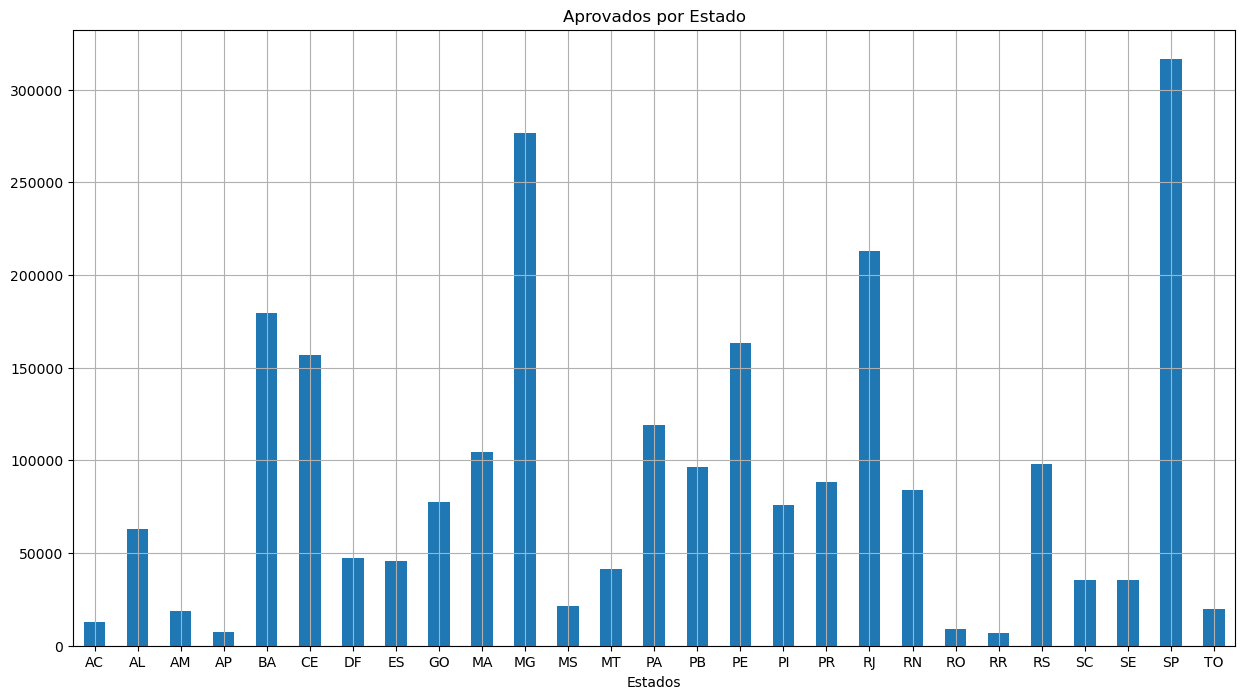

In [6]:
ap_estado_br = ListReg.groupby('SG_UF_CANDIDATO').count()
ap_estado_br = ap_estado_br['NU_ANO']
ap_estado_br = ap_estado_br.rename_axis('Estados')
ap_estado_br.plot(kind='bar',title='Aprovados por Estado', figsize=(15,8), rot=0, grid=True)

<AxesSubplot:title={'center':'Vagas por Estado'}, xlabel='Estados'>

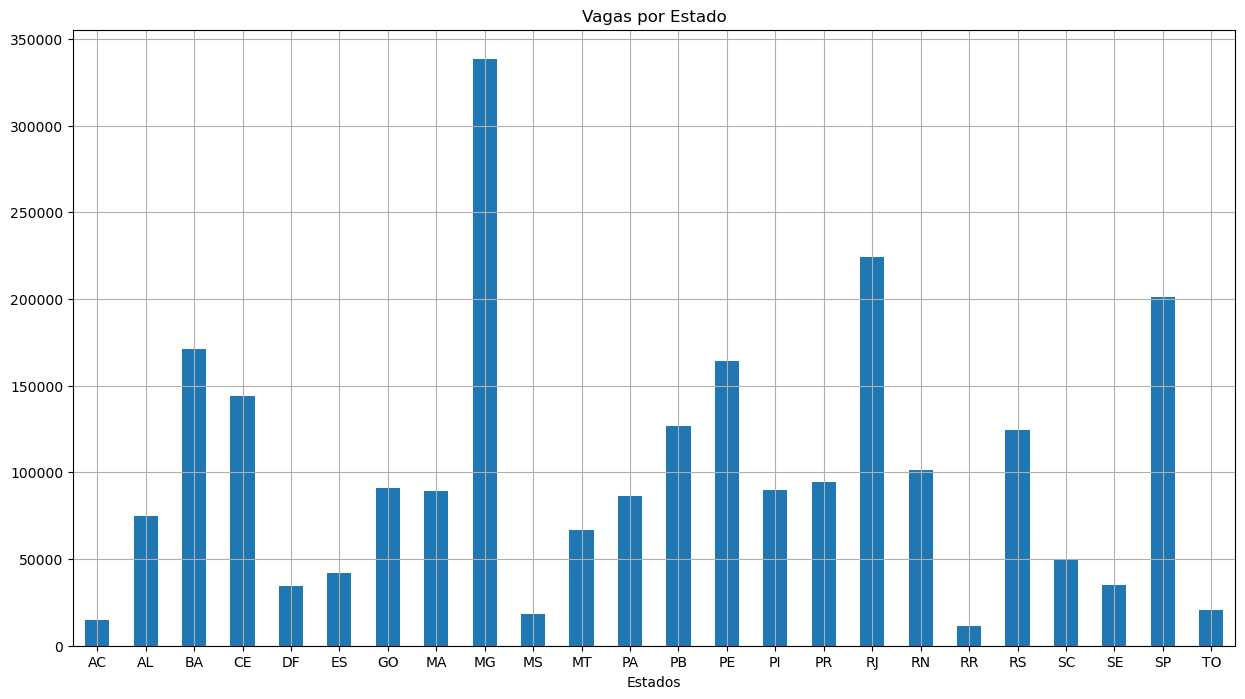

In [7]:
vaga_estado_br = ListReg.groupby('SG_UF_CAMPUS').count()
vaga_estado_br = vaga_estado_br['NU_ANO']
vaga_estado_br = vaga_estado_br.rename_axis('Estados')
vaga_estado_br.plot(kind='bar',title='Vagas por Estado', figsize=(15,8), rot=0, grid=True)

<AxesSubplot:title={'center':'Aprovados e Vagas por Estado'}, xlabel='Estados'>

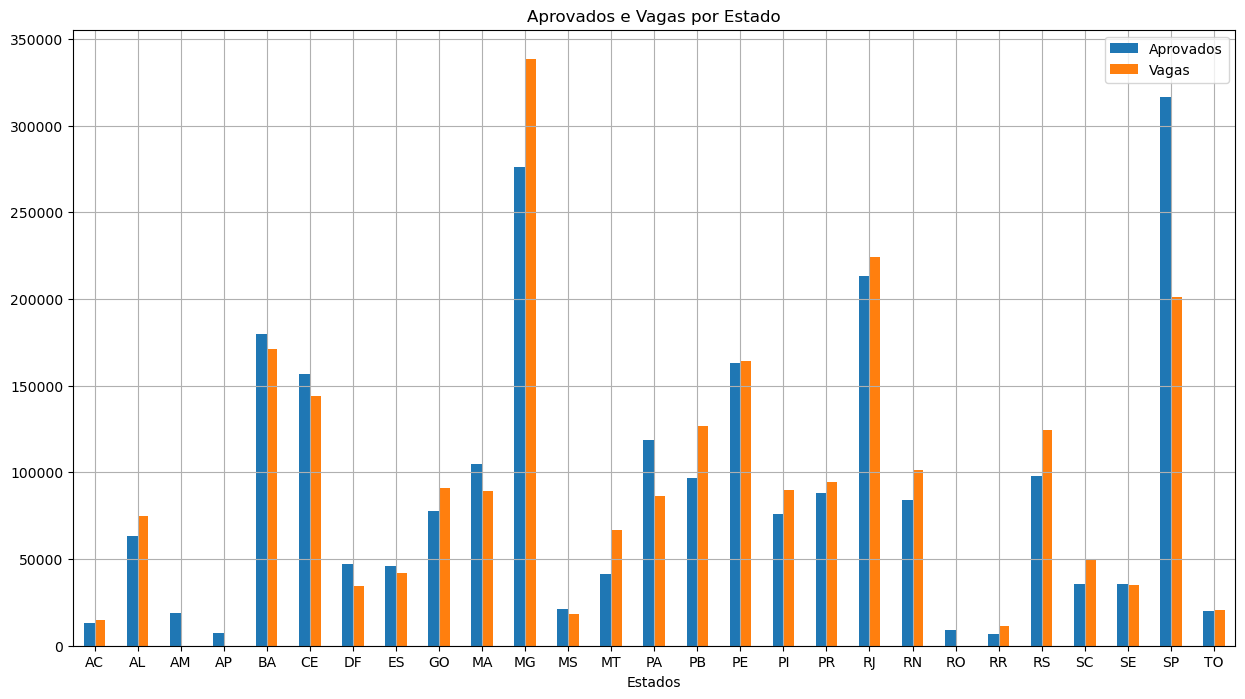

In [8]:
vaga_ap_br = pd.DataFrame(ap_estado_br)
vaga_ap_br['Vagas'] = vaga_estado_br
vaga_ap_br.columns = ['Aprovados', 'Vagas']
vaga_ap_br = vaga_ap_br.rename_axis('Estados')
vaga_ap_br.plot(kind='bar',title='Aprovados e Vagas por Estado', figsize=(15,8), rot=0, grid=True)

## OBS:
Aumento grande de vagas de 20/2 para 21/1

# Concorrencia por sexo a nível BR

In [9]:
br_masc_ampla = 0
br_fem_ampla = 0
br_masc_cota = 0
br_fem_cota = 0
for i in range(len(ListReg['NU_ANO'])):
    if ListReg['TP_MOD_CONCORRENCIA'][i] == 'A':
        if ListReg['TP_SEXO'][i] == 'M':
            br_masc_ampla += 1
        else:
            br_fem_ampla += 1
    else:
        if ListReg['TP_SEXO'][i] == 'M':
            br_masc_cota += 1
        else:
            br_fem_cota += 1

<AxesSubplot:title={'center':'Estudantes Brasil por Concorrência e Sexo'}>

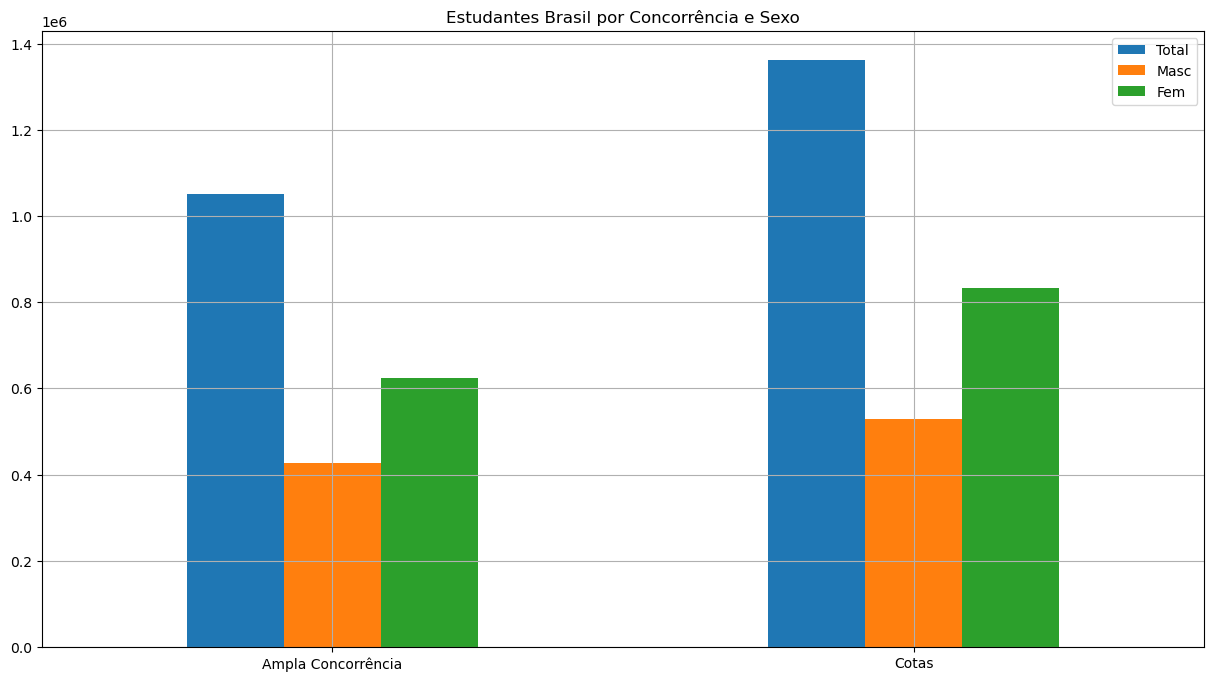

In [10]:
br_sexo_conc = pd.DataFrame([br_masc_ampla + br_fem_ampla, br_masc_cota + br_fem_cota], ['Ampla Concorrência', 'Cotas'])
br_sexo_conc.columns = ['Total']
br_sexo_conc['Masc'] = [br_masc_ampla, br_masc_cota]
br_sexo_conc['Fem'] = [br_fem_ampla, br_fem_cota]
br_sexo_conc.plot(kind='bar',title='Estudantes Brasil por Concorrência e Sexo', figsize=(15,8), rot=0, grid=True)

## OBS:
Ainda mostra como mulheres talvez tenham melhor condição de estudo

# Alunos que saem de suas cidades - por sexo e por concorrência

<AxesSubplot:title={'center':'Estudantes que Estudam Onde Residem ou Não por sexo'}>

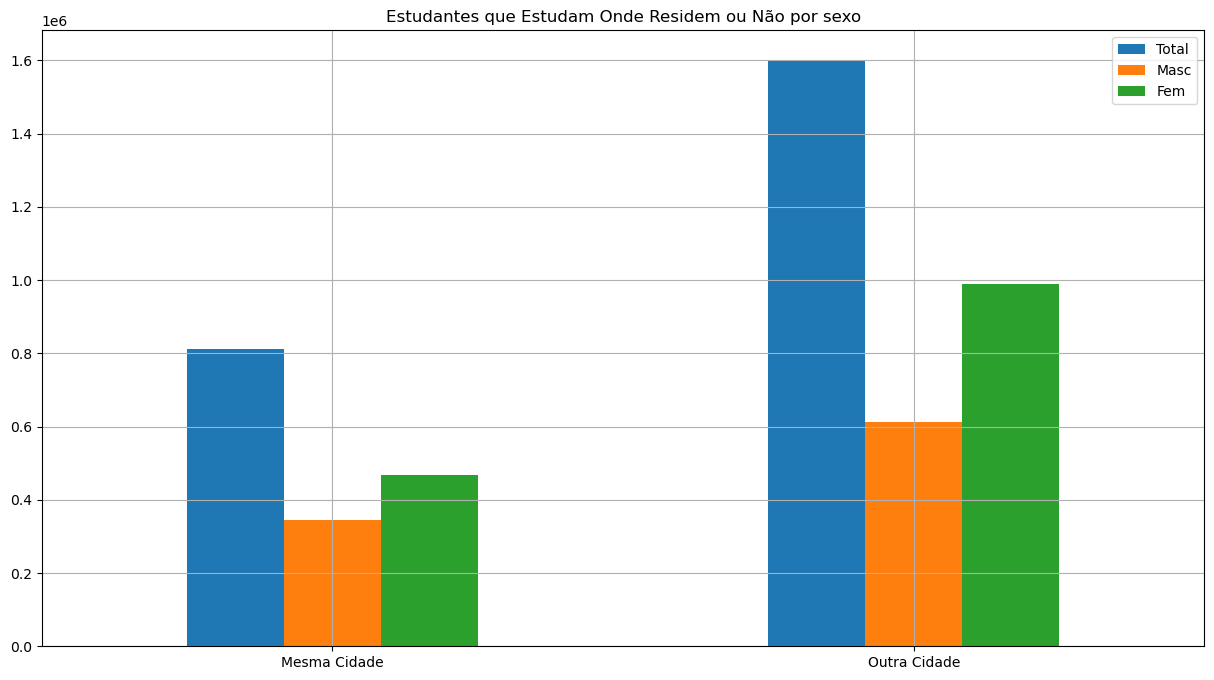

In [11]:
mesma_cidade = 0
mesma_cidade_H = 0
mesma_cidade_M = 0
outra_cidade = 0
outra_cidade_H = 0
outra_cidade_M = 0
for i in range(len(ListReg['NU_ANO'])):
    if ListReg['NO_MUNUCIPIO_CAMPUS'][i] == ListReg['MUNICIPIO_CANDIDATO'][i]:
        mesma_cidade += 1
        if ListReg['TP_SEXO'][i] == 'M':
            mesma_cidade_H += 1
        elif ListReg['TP_SEXO'][i] == 'F':
            mesma_cidade_M += 1
    elif ListReg['NO_MUNUCIPIO_CAMPUS'][i] != ListReg['MUNICIPIO_CANDIDATO'][i]:
        outra_cidade += 1
        if ListReg['TP_SEXO'][i] == 'M':
            outra_cidade_H += 1
        elif ListReg['TP_SEXO'][i] == 'F':
            outra_cidade_M += 1

mesmo_municipio = pd.DataFrame([mesma_cidade, outra_cidade],['Mesma Cidade','Outra Cidade'])
mesmo_municipio.columns = ['Total']
mesmo_municipio['Masc'] = [mesma_cidade_H, outra_cidade_H]
mesmo_municipio['Fem'] = [mesma_cidade_M, outra_cidade_M]
mesmo_municipio.plot(kind='bar',title='Estudantes que Estudam Onde Residem ou Não por sexo', figsize=(15,8), rot=0, grid=True)

## OBS:
Tendência de estudar fora da cidade em que reside, com maioria em cotas o que pode ser por virem da região metropolitana

<AxesSubplot:title={'center':' % de estudantes que Estudam Onde Residem ou Não por sexo'}>

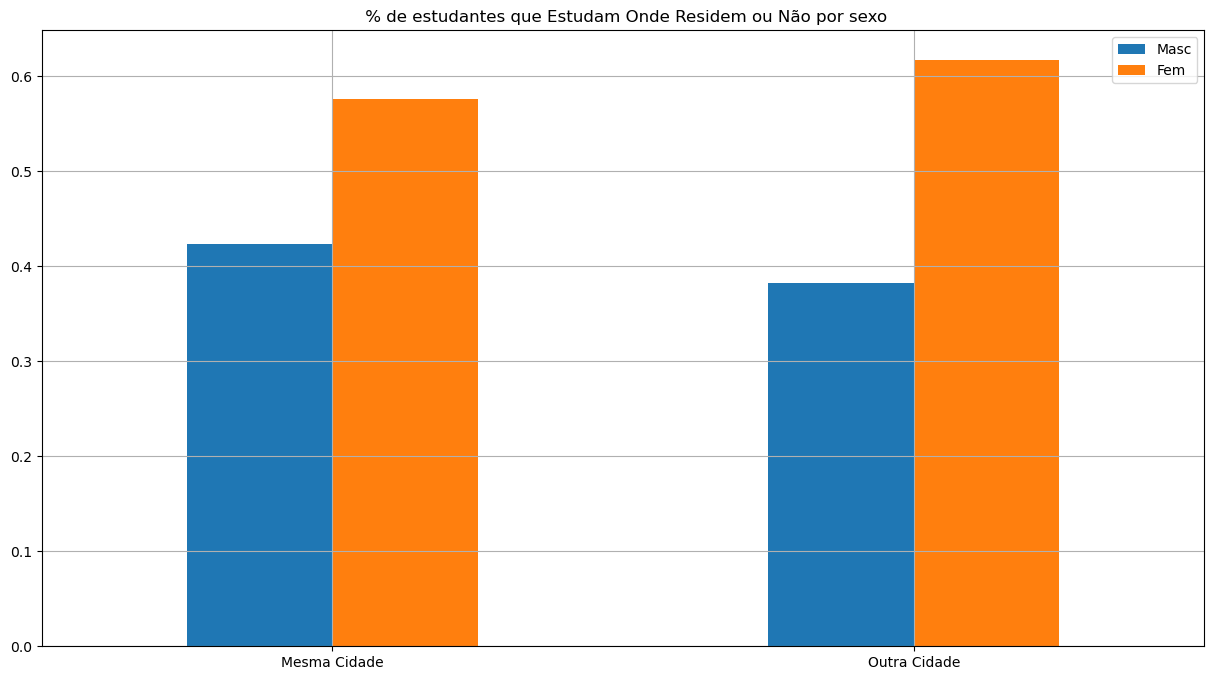

In [12]:
pc_mesmo_municipio = pd.DataFrame([mesma_cidade, outra_cidade],['Mesma Cidade','Outra Cidade'])
pc_mesmo_municipio.columns = ['Total']
pc_mesmo_municipio['Masc'] = [mesma_cidade_H / mesma_cidade, outra_cidade_H / outra_cidade]
pc_mesmo_municipio['Fem'] = [mesma_cidade_M / mesma_cidade, outra_cidade_M / outra_cidade]
pc_mesmo_municipio = pc_mesmo_municipio.drop('Total',axis=1)
pc_mesmo_municipio.plot(kind='bar',title=' % de estudantes que Estudam Onde Residem ou Não por sexo', figsize=(15,8), rot=0, grid=True)

## OBS:
Mulheres tendem mais a sair da cidade que reside para estudar

<AxesSubplot:title={'center':'Estudantes que Estudam Onde Residem ou Não por Concorrência'}>

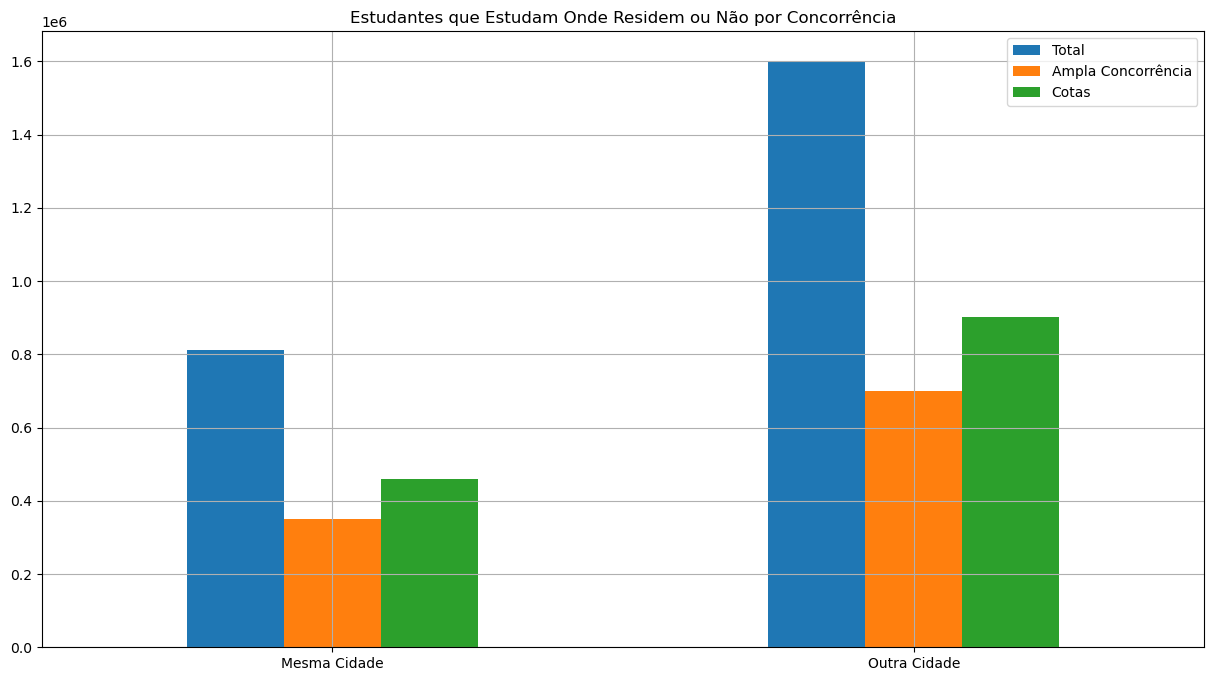

In [13]:
Ampla_Mesma = 0
Cota_Mesma = 0
Ampla_outra = 0
Cota_outra = 0
for i in range(len(ListReg['NU_ANO'])):
    if ListReg['NO_MUNUCIPIO_CAMPUS'][i] == ListReg['MUNICIPIO_CANDIDATO'][i]:
        if ListReg['TP_MOD_CONCORRENCIA'][i] == 'A':
            Ampla_Mesma += 1
        elif ListReg['TP_MOD_CONCORRENCIA'][i] == 'V':
            Cota_Mesma += 1
        elif ListReg['TP_MOD_CONCORRENCIA'][i] == 'L':
            Cota_Mesma += 1
        elif ListReg['TP_MOD_CONCORRENCIA'][i] == 'B':
            Cota_Mesma += 1
    else:
        if ListReg['TP_MOD_CONCORRENCIA'][i] == 'A':
            Ampla_outra += 1
        elif ListReg['TP_MOD_CONCORRENCIA'][i] == 'V':
            Cota_outra += 1
        elif ListReg['TP_MOD_CONCORRENCIA'][i] == 'L':
            Cota_outra += 1
        elif ListReg['TP_MOD_CONCORRENCIA'][i] == 'B':
            Cota_outra += 1
mesmo_municipio_concorrencia = pd.DataFrame([mesma_cidade, outra_cidade],['Mesma Cidade','Outra Cidade'])
mesmo_municipio_concorrencia.columns = ['Total']
mesmo_municipio_concorrencia['Ampla Concorrência'] = [Ampla_Mesma, Ampla_outra]
mesmo_municipio_concorrencia['Cotas'] = [Cota_Mesma, Cota_outra]
mesmo_municipio_concorrencia.plot(kind='bar',title='Estudantes que Estudam Onde Residem ou Não por Concorrência', figsize=(15,8), rot=0, grid=True)

## OBS:
Alunos do grupo de cotas tendem mais a sair de ondem residem

# Alunos que saem de seus estados - por sexo, por concorrência

<AxesSubplot:title={'center':'Estudantes que Estudam Onde Residem ou Não por sexo'}>

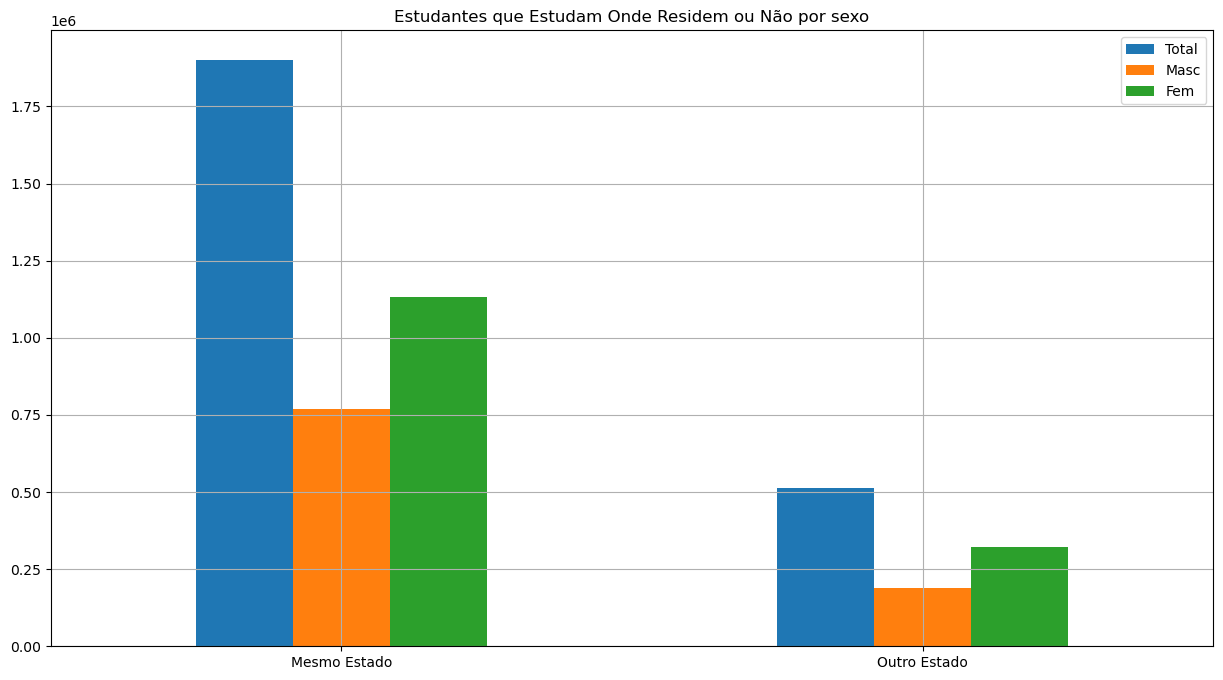

In [14]:
mesmo_estado_ = 0
mesmo_estado_H = 0
mesmo_estado_M = 0
outro_estado = 0
outro_estado_H = 0
outro_estado_M = 0
for i in range(len(ListReg['NU_ANO'])):
    if ListReg['SG_UF_CAMPUS'][i] == ListReg['SG_UF_CANDIDATO'][i]:
        mesmo_estado_ += 1
        if ListReg['TP_SEXO'][i] == 'M':
            mesmo_estado_H += 1
        elif ListReg['TP_SEXO'][i] == 'F':
            mesmo_estado_M += 1
    elif ListReg['SG_UF_CAMPUS'][i] != ListReg['SG_UF_CANDIDATO'][i]:
        outro_estado += 1
        if ListReg['TP_SEXO'][i] == 'M':
            outro_estado_H += 1
        elif ListReg['TP_SEXO'][i] == 'F':
            outro_estado_M += 1

mesmo_estado = pd.DataFrame([mesmo_estado_, outro_estado],['Mesmo Estado','Outro Estado'])
mesmo_estado.columns = ['Total']
mesmo_estado['Masc'] = [mesmo_estado_H, outro_estado_H]
mesmo_estado['Fem'] = [mesmo_estado_M, outro_estado_M]
mesmo_estado.plot(kind='bar',title='Estudantes que Estudam Onde Residem ou Não por sexo', figsize=(15,8), rot=0, grid=True)


## OBS:
De 20/2 para 21/1 o que era aproximadamente 1/3 saindo dos estados virou aproximadamente 21%

<AxesSubplot:title={'center':'Estudantes que Estudam no Mesmo Estado ou Não por sexo'}>

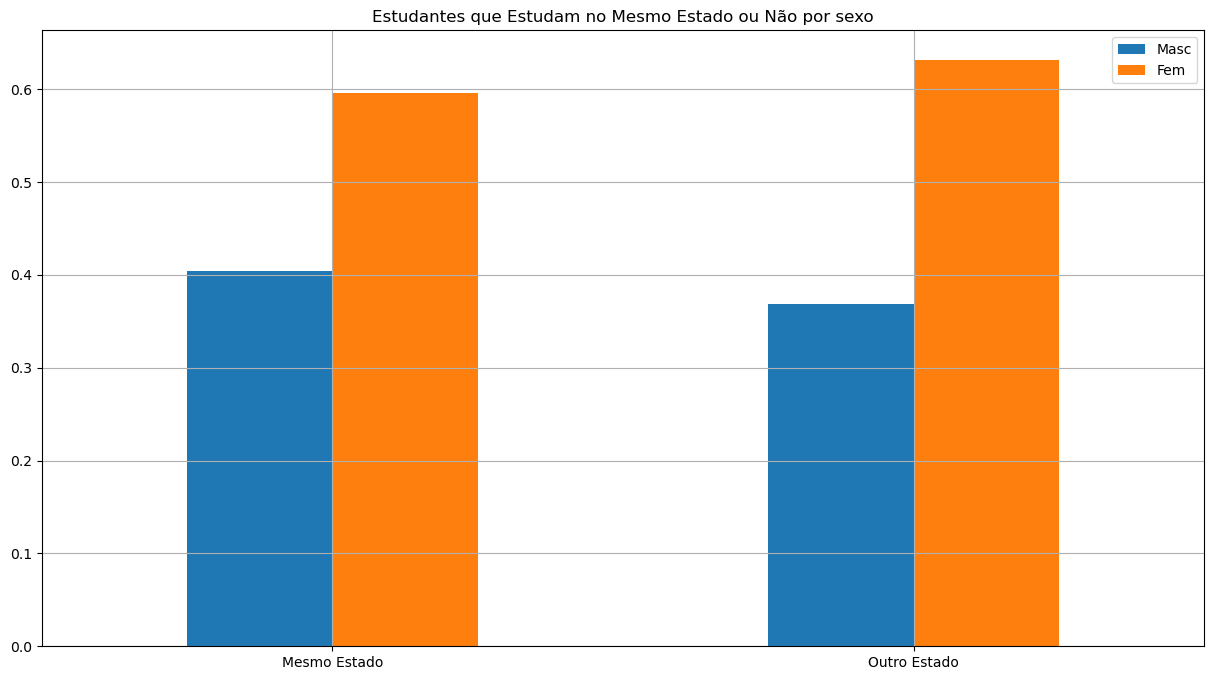

In [15]:
pc_mesmo_estado = pd.DataFrame([mesmo_estado_, outro_estado],['Mesmo Estado','Outro Estado'])
pc_mesmo_estado.columns = ['Total']
pc_mesmo_estado['Masc'] = [mesmo_estado_H / mesmo_estado_, outro_estado_H / outro_estado]
pc_mesmo_estado['Fem'] = [mesmo_estado_M / mesmo_estado_, outro_estado_M / outro_estado]
pc_mesmo_estado = pc_mesmo_estado.drop('Total', axis=1)
pc_mesmo_estado.plot(kind='bar',title='Estudantes que Estudam no Mesmo Estado ou Não por sexo', figsize=(15,8), rot=0, grid=True)

## OBS:
Reforça o melhor acesso a educação para o público feminino

<AxesSubplot:title={'center':'Estudantes que Estudam no Mesmo Estado ou Não por Concorrência'}>

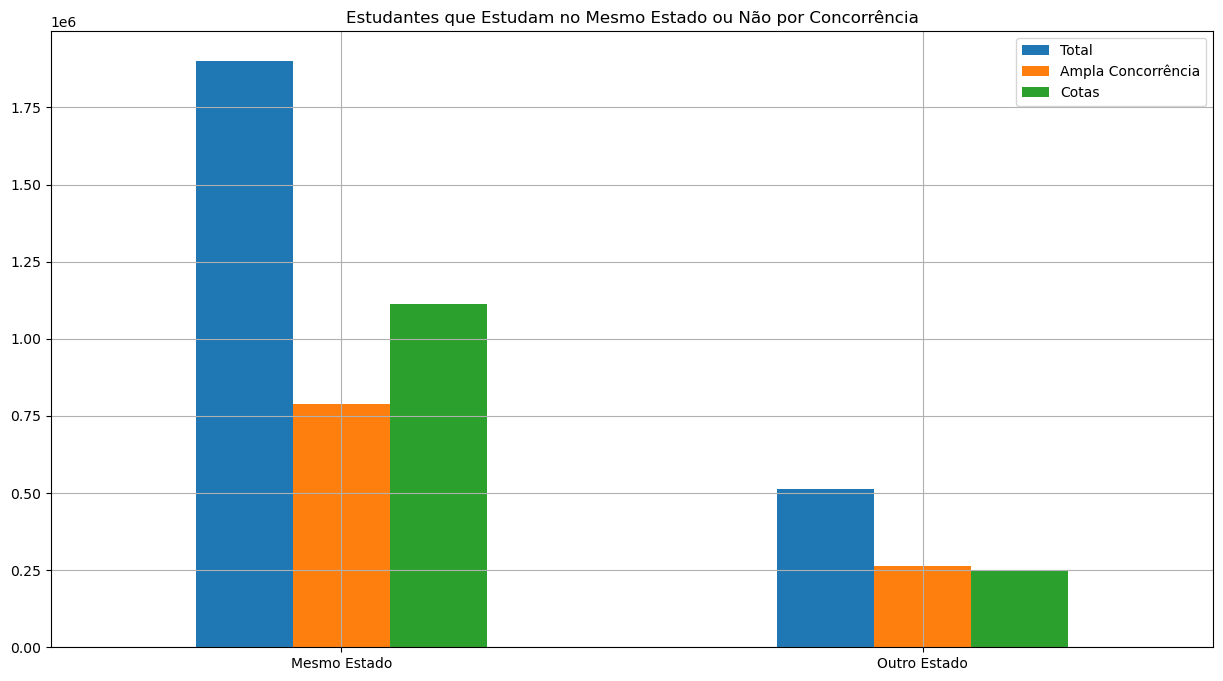

In [16]:
Ampla_Mesmo = 0
Cota_Mesmo = 0
Ampla_outro = 0
Cota_outro = 0
for i in range(len(ListReg['NU_ANO'])):
    if ListReg['SG_UF_CAMPUS'][i] == ListReg['SG_UF_CANDIDATO'][i]:
        if ListReg['TP_MOD_CONCORRENCIA'][i] == 'A':
            Ampla_Mesmo += 1
        elif ListReg['TP_MOD_CONCORRENCIA'][i] == 'V':
            Cota_Mesmo += 1
        elif ListReg['TP_MOD_CONCORRENCIA'][i] == 'L':
            Cota_Mesmo += 1
        elif ListReg['TP_MOD_CONCORRENCIA'][i] == 'B':
            Cota_Mesmo += 1
    else:
        if ListReg['TP_MOD_CONCORRENCIA'][i] == 'A':
            Ampla_outro += 1
        elif ListReg['TP_MOD_CONCORRENCIA'][i] == 'V':
            Cota_outro += 1
        elif ListReg['TP_MOD_CONCORRENCIA'][i] == 'L':
            Cota_outro += 1
        elif ListReg['TP_MOD_CONCORRENCIA'][i] == 'B':
            Cota_outro += 1
mesmo_estado_concorrencia = pd.DataFrame([mesmo_estado_, outro_estado],['Mesmo Estado','Outro Estado'])
mesmo_estado_concorrencia.columns = ['Total']
mesmo_estado_concorrencia['Ampla Concorrência'] = [Ampla_Mesmo, Ampla_outro]
mesmo_estado_concorrencia['Cotas'] = [Cota_Mesmo, Cota_outro]
mesmo_estado_concorrencia.plot(kind='bar',title='Estudantes que Estudam no Mesmo Estado ou Não por Concorrência', figsize=(15,8), rot=0, grid=True)

## OBS:
Tendência de alunos com cotas ficarem mais em seus estados e redução da porcentagem de alunos saindo dos estados em relação a 20/2

# Estudantes da UTFPR por sexo, concorrência se de fora ou não

In [17]:
#Alunos de fora do estado na UTFPR - por sexo, por concorrencia
#Alunos do estado em outras cidades na UTFPR - por sexo, por concorrencia
utf = 0
utf_M = 0
utf_H = 0
utf_ampla = 0
utf_ampla_H = 0
utf_ampla_M = 0
utf_cota = 0
utf_cota_H = 0
utf_cota_M = 0
utf_mesmo_estado = 0
utf_mesmo_estado_H = 0
utf_mesmo_estado_M = 0
utf_mesmo_estado_ampla = 0
utf_mesmo_estado_cota = 0
utf_outro_estado = 0
utf_outro_estado_H = 0
utf_outro_estado_M = 0
utf_outro_estado_ampla = 0
utf_outro_estado_cota = 0
utf_mesma_cidade = 0
utf_mesma_cidade_H = 0
utf_mesma_cidade_M = 0
utf_mesma_cidade_ampla = 0
utf_mesma_cidade_cota = 0
utf_outra_cidade = 0
utf_outra_cidade_H = 0
utf_outra_cidade_M = 0
utf_outra_cidade_ampla = 0
utf_outra_cidade_cota = 0

for i in range(len(ListReg['NU_ANO'])):
    if ListReg['SIGLA_IES'][i] == 'UTFPR':
        utf += 1
        if ListReg['TP_SEXO'][i] == 'M':
            utf_H += 1
            if ListReg['TP_MOD_CONCORRENCIA'][i] == 'A':
                utf_ampla += 1
                utf_ampla_H += 1
            elif ListReg['TP_MOD_CONCORRENCIA'][i] == 'V' or ListReg['TP_MOD_CONCORRENCIA'][i] == 'L' or ListReg['TP_MOD_CONCORRENCIA'][i] == 'B': 
                utf_cota += 1
                utf_cota_H += 1
        elif ListReg['TP_SEXO'][i] == 'F':
            utf_M += 1
            if ListReg['TP_MOD_CONCORRENCIA'][i] == 'A':
                utf_ampla += 1
                utf_ampla_M += 1
            elif ListReg['TP_MOD_CONCORRENCIA'][i] == 'V' or ListReg['TP_MOD_CONCORRENCIA'][i] == 'L' or ListReg['TP_MOD_CONCORRENCIA'][i] == 'B': 
                utf_cota += 1
                utf_cota_M += 1
        if ListReg['SG_UF_CAMPUS'][i] == ListReg['SG_UF_CANDIDATO'][i]:
            utf_mesmo_estado += 1
            if ListReg['TP_SEXO'][i] == 'M':
                utf_mesmo_estado_H += 1
                if ListReg['TP_MOD_CONCORRENCIA'][i] == 'A':
                     utf_mesmo_estado_ampla += 1
                elif ListReg['TP_MOD_CONCORRENCIA'][i] == 'V' or ListReg['TP_MOD_CONCORRENCIA'][i] == 'L' or ListReg['TP_MOD_CONCORRENCIA'][i] == 'B': 
                     utf_mesmo_estado_cota += 1
            elif ListReg['TP_SEXO'][i] == 'F':
                utf_mesmo_estado_M += 1
                if ListReg['TP_MOD_CONCORRENCIA'][i] == 'A':
                     utf_mesmo_estado_ampla += 1
                elif ListReg['TP_MOD_CONCORRENCIA'][i] == 'V' or ListReg['TP_MOD_CONCORRENCIA'][i] == 'L' or ListReg['TP_MOD_CONCORRENCIA'][i] == 'B': 
                     utf_mesmo_estado_cota += 1
        else:
            utf_outro_estado += 1
            if ListReg['TP_SEXO'][i] == 'M':
                utf_outro_estado_H += 1
                if ListReg['TP_MOD_CONCORRENCIA'][i] == 'A':
                    utf_outro_estado_ampla += 1
                elif ListReg['TP_MOD_CONCORRENCIA'][i] == 'V' or ListReg['TP_MOD_CONCORRENCIA'][i] == 'L' or ListReg['TP_MOD_CONCORRENCIA'][i] == 'B': 
                    utf_outro_estado_cota += 1
            elif ListReg['TP_SEXO'][i] == 'F':
                utf_outro_estado_M += 1
                if ListReg['TP_MOD_CONCORRENCIA'][i] == 'A':
                    utf_outro_estado_ampla += 1
                elif ListReg['TP_MOD_CONCORRENCIA'][i] == 'V' or ListReg['TP_MOD_CONCORRENCIA'][i] == 'L' or ListReg['TP_MOD_CONCORRENCIA'][i] == 'B': 
                    utf_outro_estado_cota += 1
        if ListReg['NO_MUNUCIPIO_CAMPUS'][i] == ListReg['MUNICIPIO_CANDIDATO'][i]:
            utf_mesma_cidade += 1
            if ListReg['TP_SEXO'][i] == 'M':
                utf_mesma_cidade_H += 1
                if ListReg['TP_MOD_CONCORRENCIA'][i] == 'A':
                     utf_mesma_cidade_ampla += 1
                elif ListReg['TP_MOD_CONCORRENCIA'][i] == 'V' or ListReg['TP_MOD_CONCORRENCIA'][i] == 'L' or ListReg['TP_MOD_CONCORRENCIA'][i] == 'B': 
                     utf_mesma_cidade_cota += 1
            elif ListReg['TP_SEXO'][i] == 'F':
                utf_mesma_cidade_M += 1
                if ListReg['TP_MOD_CONCORRENCIA'][i] == 'A':
                     utf_mesma_cidade_ampla += 1
                elif ListReg['TP_MOD_CONCORRENCIA'][i] == 'V' or ListReg['TP_MOD_CONCORRENCIA'][i] == 'L' or ListReg['TP_MOD_CONCORRENCIA'][i] == 'B': 
                     utf_mesma_cidade_cota += 1
        else:
            utf_outra_cidade += 1
            if ListReg['TP_SEXO'][i] == 'M':
                utf_outra_cidade_H += 1
                if ListReg['TP_MOD_CONCORRENCIA'][i] == 'A':
                    utf_outra_cidade_ampla += 1
                elif ListReg['TP_MOD_CONCORRENCIA'][i] == 'V' or ListReg['TP_MOD_CONCORRENCIA'][i] == 'L' or ListReg['TP_MOD_CONCORRENCIA'][i] == 'B': 
                    utf_outra_cidade_cota += 1
            elif ListReg['TP_SEXO'][i] == 'F':
                utf_outra_cidade_M += 1
                if ListReg['TP_MOD_CONCORRENCIA'][i] == 'A':
                    utf_outra_cidade_ampla += 1
                elif ListReg['TP_MOD_CONCORRENCIA'][i] == 'V' or ListReg['TP_MOD_CONCORRENCIA'][i] == 'L' or ListReg['TP_MOD_CONCORRENCIA'][i] == 'B': 
                    utf_outra_cidade_cota += 1

<AxesSubplot:title={'center':'Estudantes da UTFPR'}>

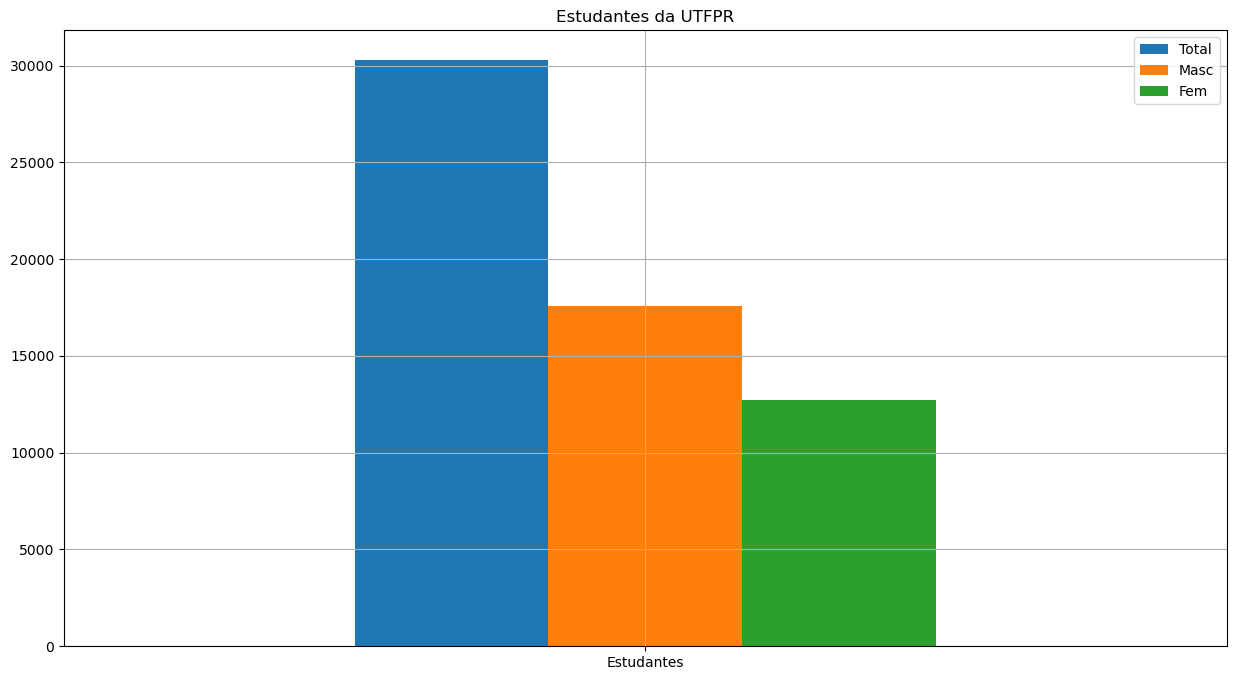

In [18]:
utf_tot = pd.DataFrame([utf],['Estudantes'])
utf_tot.columns = ['Total']
utf_tot['Masc'] = utf_H
utf_tot['Fem'] = utf_M
utf_tot.plot(kind='bar',title='Estudantes da UTFPR', figsize=(15,8), rot=0, grid=True)

## OBS: 
Aumento significativo na proporção masculina na UTFPR em comparação a 20/2 

<AxesSubplot:title={'center':'Estudantes UTFPR por Concorrência e Sexo'}>

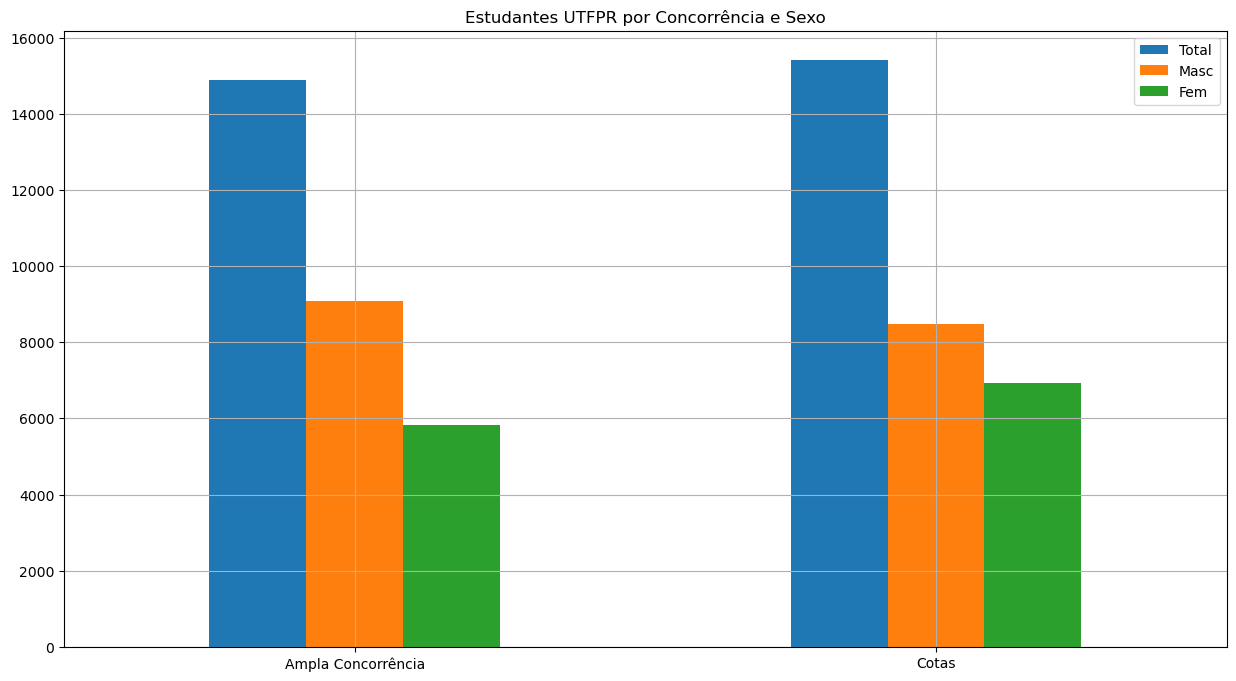

In [19]:
utf_conc = pd.DataFrame([utf_ampla, utf_cota], ['Ampla Concorrência', 'Cotas'])
utf_conc.columns = ['Total']
utf_conc['Masc'] = [utf_ampla_H, utf_cota_H]
utf_conc['Fem'] = [utf_ampla_M, utf_cota_M]
utf_conc.plot(kind='bar',title='Estudantes UTFPR por Concorrência e Sexo', figsize=(15,8), rot=0, grid=True)

## OBS: 
Com o aumento da presença masculina do semestre anterior e ainda mantendo o padrão de termos mais presença feminina com cotas

<AxesSubplot:title={'center':'Estudantes UTFPR Do PR ou Fora por Concorrência e Sexo'}>

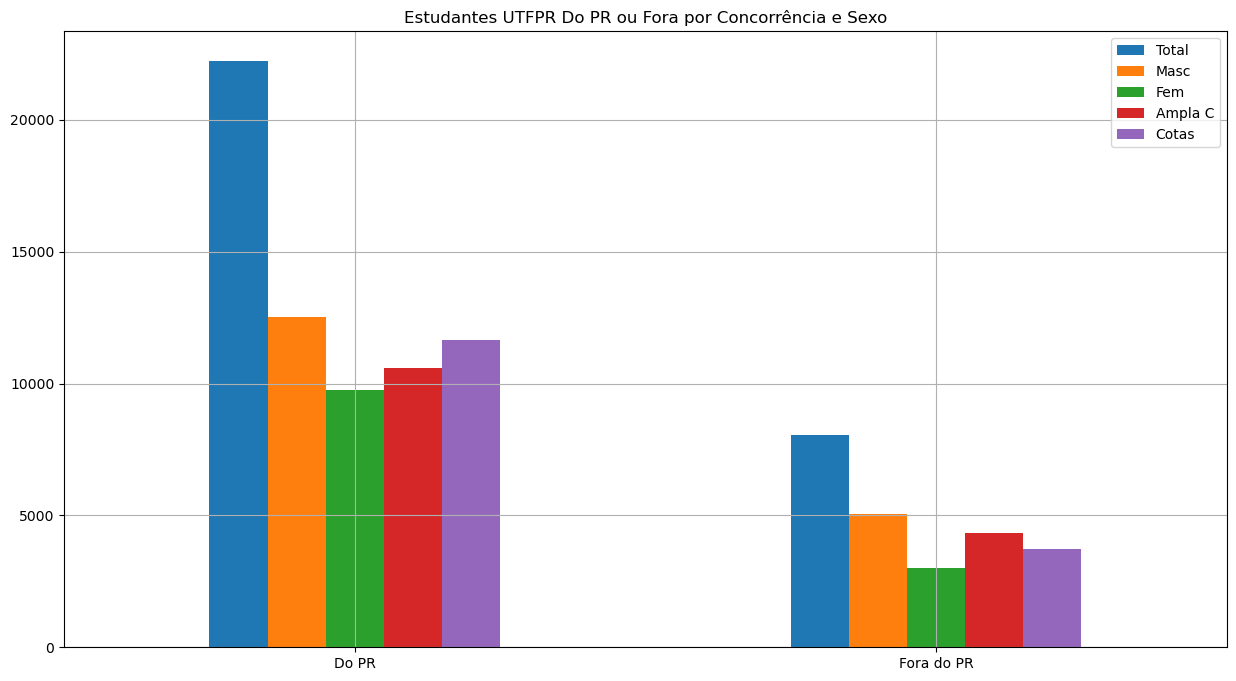

In [20]:
utf_PR = pd.DataFrame([utf_mesmo_estado, utf_outro_estado], ['Do PR', 'Fora do PR'])
utf_PR.columns = ['Total']
utf_PR['Masc'] = [utf_mesmo_estado_H, utf_outro_estado_H]
utf_PR['Fem'] = [utf_mesmo_estado_M, utf_outro_estado_M]
utf_PR['Ampla C'] = [utf_mesmo_estado_ampla, utf_outro_estado_ampla]
utf_PR['Cotas'] = [utf_mesmo_estado_cota, utf_outro_estado_cota]
utf_PR.plot(kind='bar',title='Estudantes UTFPR Do PR ou Fora por Concorrência e Sexo', figsize=(15,8), rot=0, grid=True)

## OBS:
A redução de pessoas de fora do estado já foi vista em comparação ao semestre anterior, agora com predominância de estudantes residentes no estado. Para ampla concorrência temos mais vindos de fora do que do estado e nas cotas se inverte.

<AxesSubplot:title={'center':'Estudantes UTFPR da Cidade do Campus ou Fora por Concorrência e Sexo'}>

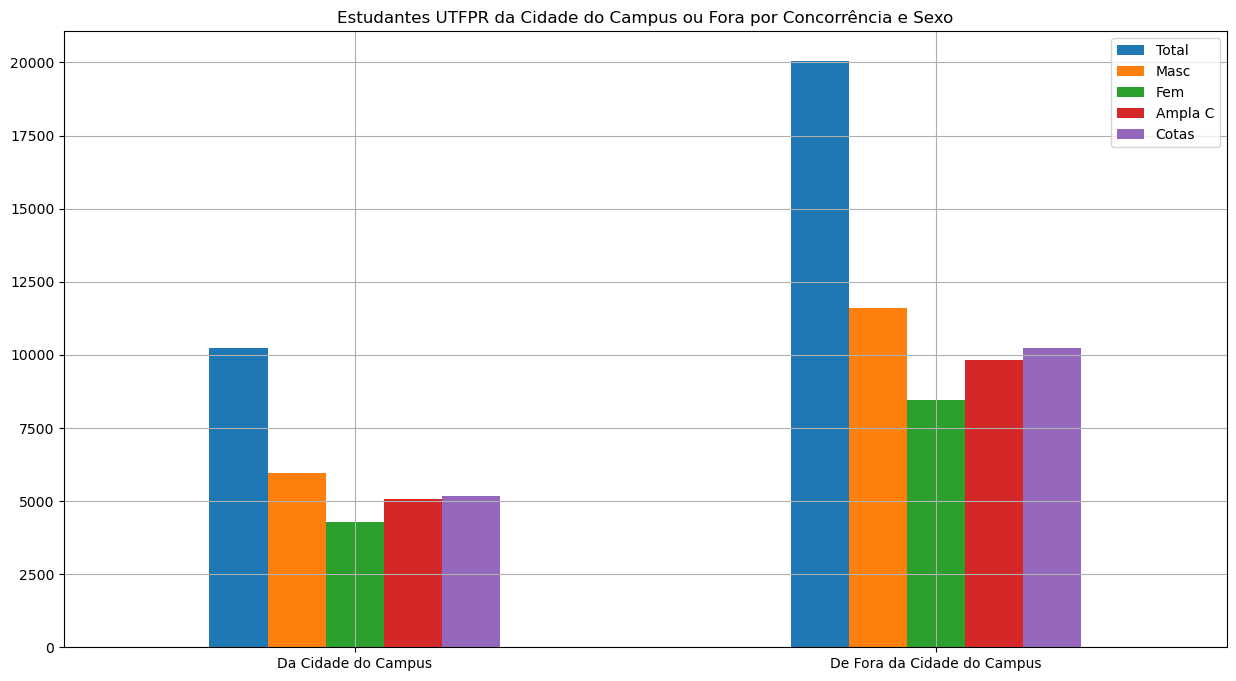

In [21]:
utf_Cidade = pd.DataFrame([utf_mesma_cidade, utf_outra_cidade], ['Da Cidade do Campus', 'De Fora da Cidade do Campus'])
utf_Cidade.columns = ['Total']
utf_Cidade['Masc'] = [utf_mesma_cidade_H, utf_outra_cidade_H]
utf_Cidade['Fem'] = [utf_mesma_cidade_M, utf_outra_cidade_M]
utf_Cidade['Ampla C'] = [utf_mesma_cidade_ampla, utf_outra_cidade_ampla]
utf_Cidade['Cotas'] = [utf_mesma_cidade_cota, utf_outra_cidade_cota]
utf_Cidade.plot(kind='bar',title='Estudantes UTFPR da Cidade do Campus ou Fora por Concorrência e Sexo', figsize=(15,8), rot=0, grid=True)

## OBS:
Os dados se mostram muito equilibrados em relação a publico concorrência, mas como já mencionado o aumento do público masculino. Chama a atenção que aproximadamente 1/3 estuda na mesma cidade que reside contra 21% do semestre anterior.